# Linear Regression in Python

**Мета:** ознайомитись з поняттями простої лінійної регресії та роботи з наданими даними для прогнозування
в Python.

**Передумови / сценарій** <br/>
У статистиці лінійна регресія - це спосіб моделювання взаємозв'язку між залежною змінною р і
незалежною змінною х. У цій лабораторній роботі ви проаналізуєте дані про продажі району та побудуєте
просту лінійну регресію для прогнозування річного чистого обсягу продажів на основі кількості магазинів у
районі.

## Частина 1: Імпорт бібліотек та даних

**Крок 1: Імпорт бібліотек**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Крок 2: Імпорт даних**

In [2]:
# Import the file, stores-dist.csv
salesDist = pd.read_csv('./Data/stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Заголовки стовпців annual net sales, number of stores in district перейменовані для
полегшення обробки даних.

In [3]:
# The district column has no relevance at this time, so it can be dropped.
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


## Частина 2: Складання даних

**Крок 1: Визначення співвідношення** <br/>
Дослідження кореляції даних до регресійного аналізу.

In [4]:
# Check correlation of data prior to doing the analysis
salesDist.corr(method='pearson')

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


З коефіцієнта кореляції виявляється, що стовпець district має низьку кореляцію до annual net
sales і number of stores in the district. Отже, колонна округа не є необхідною як частина
регресійного аналізу. Колонка district може бути виключена з dataframe.

In [5]:
# The district column has no relevance at this time, so it can be dropped.
sales = salesDist.drop('district', axis=1, inplace=False)
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


Тип кореляції між річними чистими продажами та кількістю магазинів у районі - <font color = 'grey'> сильна обернена кореляція </font>

**Крок 2: Створення сюжету** <br/>
Створення графіка для візуалізації даних, призначення магазину як незалежна
змінну х а продаж як залежна змінна р.

In [6]:
# dependent variable for y axis
y = sales['sales']
# independent variable for x axis
x = sales.stores

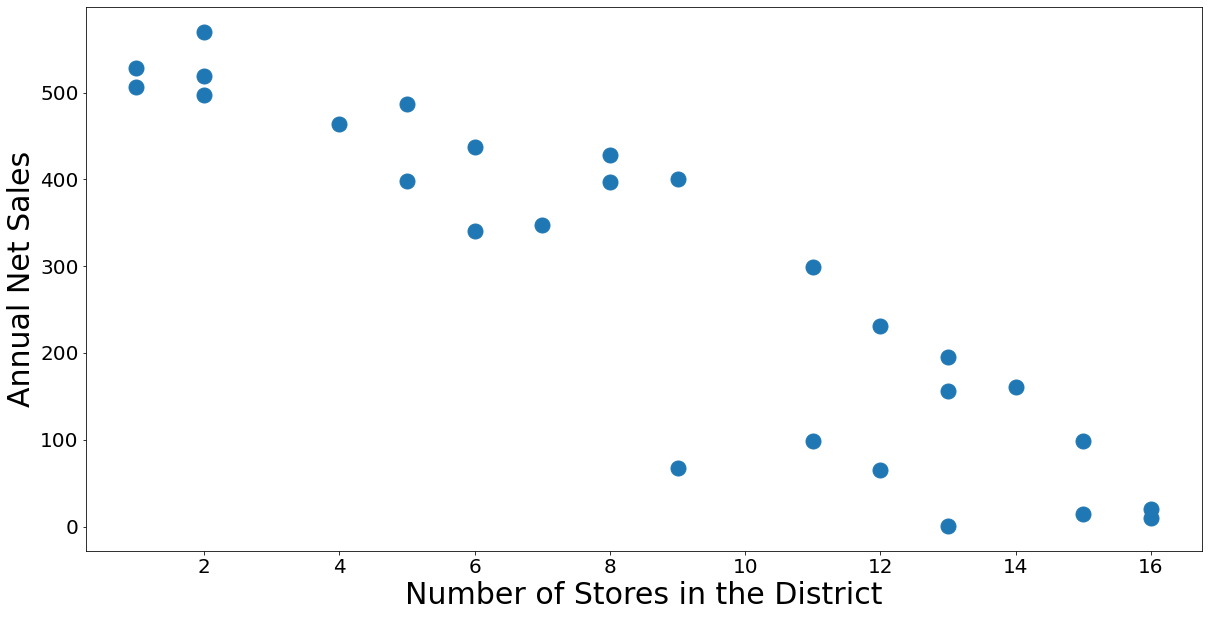

In [7]:
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in the District', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

## Частина 3: Побудова простої лінійної регресії

У цій частині використовується numpy для створення лінії регресії для аналізованих даних, також розраховується центроїд для цього набору даних. Центрод - це середнє значення для набору
даних. Сформована проста лінійна лінійна регресія також повинна проходити через центроїд.

**Крок 1: Обчислення нахилу та перетину Y-лінії лінійної регресії** <br/>

In [8]:
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


**Крок 2: Обчислення центроїда** <br/>
Центроїд набору даних обчислюється за допомогою функції середнього значення.

In [9]:
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 8.74 and y = 286.57.


**Крок 3: Накладення лінії регресії та центральної точки на графіку**

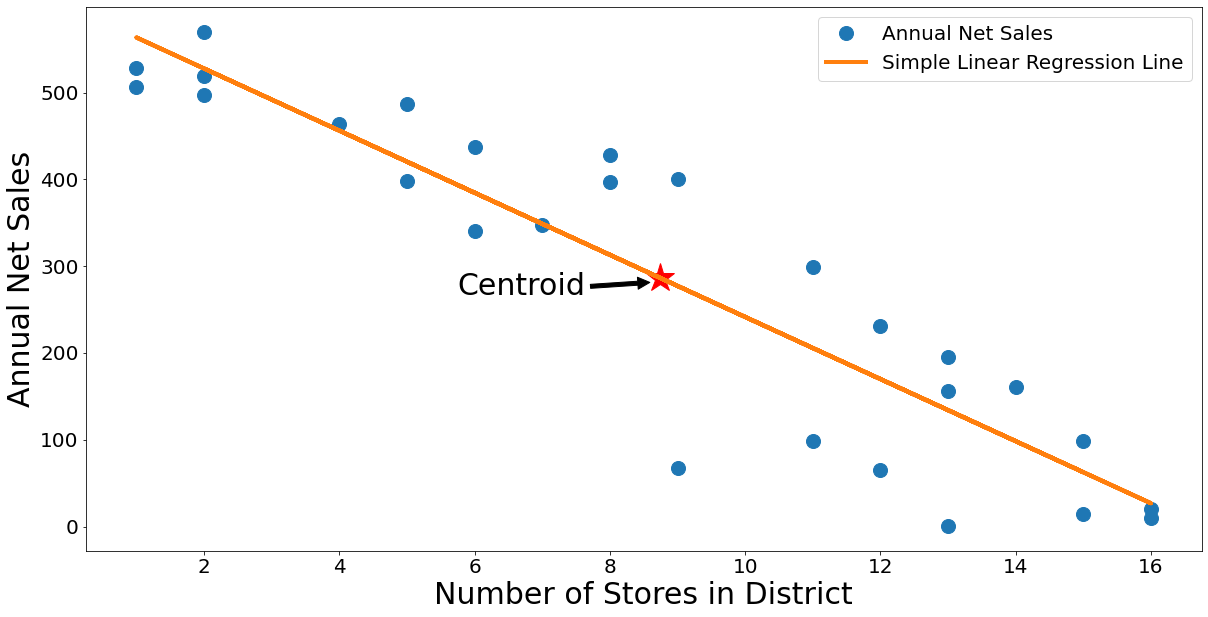

In [10]:
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in District', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

**Крок 4: Прогнозування** <br/>
Використовуючи лінійну лінійну регресію, можна передбачити річний чистий обсяг продажів на основі
кількості магазинів у районі.

In [11]:
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [12]:
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207654

Прогнозований чистий продаж, якщо в районі є 4 магазини - <font color = 'grey'> 456.2313681207654 </font>

<p style="text-align: center;"><b>Висновки</b></p>

В ході виконанні лабораторної роботи було розглянуто поняття простої лінійної регресії, за допомогою Python було проаналізовано дані про продажі району та побудовано просту лінійну регресію для прогнозування річного чистого обсягу продажів на основі кількості магазинів у районі.